In [1]:
%load_ext autoreload
%autoreload 2

import collections

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import mlproof as mlp
import numpy as np

In [4]:
raveler_vis = [
    1.2933364835,
    1.0748483873,
    1.659448303,
    1.659448303,
    0.8581251627,
    0.8985669191,
    0.9424156715,
    1.2453366615,
    1.0117972282
]

In [5]:
mojo_vis = [
    1.3988405225,
    1.1417752363,
    1.047126737,
    1.1334794092,
    1.0741744714,
    1.1068883625,
    1.0707135451,
    1.0300624282,
    0.9835024532
]

In [6]:
dojo_vis = [
    0.8687744295,
    1.028029502,
    0.8772470205,
    0.9228280267,
    1.0079764563,
    0.8485155086,
    1.0727786456,
    0.7849292608,
    0.8773981852,
    0.7526550715
]

In [67]:
data = {
    'Dojo': dojo_vis,
    'Mojo': mojo_vis,
    'Raveler': raveler_vis
}

In [73]:
  def plot_vis(data,filename=None):

    median_input_vi = np.median(data.values()[0])
    median_input_vi_count = len(data.values())+3

    fig, ax = plt.subplots(figsize=(22,22))
#     ax.plot(range(median_input_vi_count), [median_input_vi]*median_input_vi_count, 'k:' , color='gray', linewidth=2, label='Avg. input VI')
    ax.plot(range(median_input_vi_count), [0.9760881507864134]*median_input_vi_count, 'k:' , color='gray', linewidth=2, label='Avg. input VI')

    ax.plot(range(median_input_vi_count), [1.8319898566]*median_input_vi_count, 'k:' , color='red', linewidth=2, label='Avg. input VI')
    ax.plot(range(median_input_vi_count), [1.76682586578]*median_input_vi_count, 'k:' , color='red', linewidth=2, label='Avg. input VI')
    
    
    
    
    objects = data.keys()

    y_pos = range(1,len(objects)+1)

    # setp(r['whiskers'], color='black', lw=2) 
    plt.ylabel('Variation of Information', labelpad=20)

    plt.setp(plt.xticks()[1], rotation=45)
    ax.tick_params(axis='both', which='major', pad=15)
    plt.ylim([0.0,2.0])
    font = {'family' : 'normal',
    #         'weight' : 'bold',
            'size'   : 26}

    plt.rc('font', **font)
    
    bp = plt.boxplot(data.values(), 0, 'gD', whis=4.5)
    plt.setp(bp['boxes'], linewidth=4)
    plt.setp(bp['medians'], linewidth=4)        
    plt.xticks(y_pos, objects)

    if filename:
      plt.savefig(filename)

    plt.show()

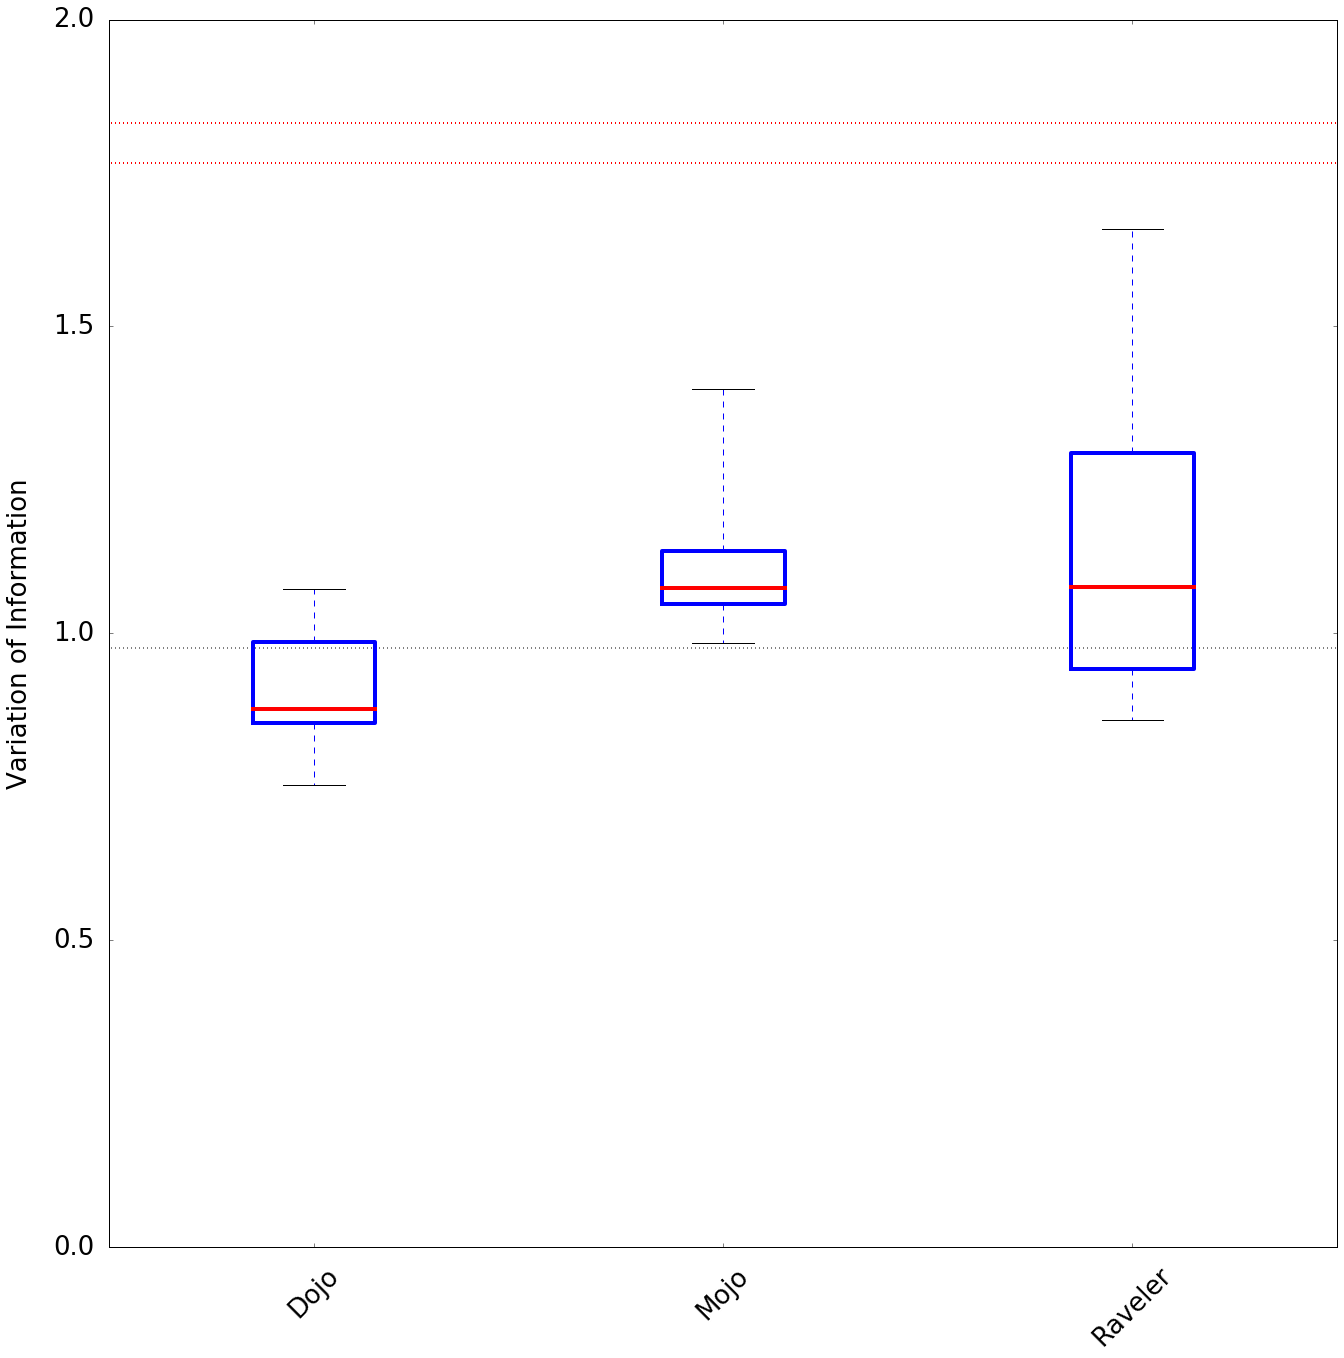

In [75]:
plot_vis(data, filename='/tmp/new_dojo.pdf')

In [22]:
    input_image, input_prob, input_gold, input_rhoana, dojo_bbox = mlp.Legacy.read_dojo_data()
    dojo_mean_VI, dojo_median_VI, dojo_VI_s = mlp.Legacy.VI(input_gold, input_rhoana)

In [47]:
mlp.Util.vi(mlp.Util.relabel(input_gold).astype(np.uint32), mlp.Util.relabel(input_rhoana).astype(np.uint32))

1.415560489477496

In [26]:
import partition_comparison

In [48]:
input_gold.shape

(10, 474, 474)

In [51]:
import mlproof.tifffile as tif

In [55]:
path_prefix = '/home/d/dojo_xp/data/'
input_rhoana = tif.imread(path_prefix+'dojo_data_vis2014/labels_after_automatic_segmentation_multi.tif')
input_gold = tif.imread(path_prefix+'dojo_data_vis2014/groundtruth_multi.tif')

In [58]:
input_gold.shape

(10, 1024, 1024)

In [61]:
vi_orig = mlp.Util.vi(input_gold.astype(np.uint32), input_rhoana.astype(np.uint32))

In [65]:
    dojo_mean_VI, dojo_median_VI, dojo_VI_s = mlp.Legacy.VI(input_gold, input_rhoana)

In [66]:
dojo_mean_VI

0.74160490162690551

In [70]:
vi_orig

0.9760881507864134